# Raster Mosaic

In [1]:
import os
import rasterio

from matplotlib import pyplot as plt
from rasterio.merge import merge
from rasterio.plot import show

In [2]:
tile_dir = r"./data/BigEarthNet-S2/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP"
# Bands: ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B8A', 'B08', 'B09', 'B11', 'B12']
band = "B08"
mosaic_dir = os.path.join(tile_dir, "mosaic.tif")

In [3]:
def load_raster_files(image_dir, band):
    raster_files = []
    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.endswith(f"_{band}.tif"):
                filepath = os.path.join(root, file)
                src = rasterio.open(filepath)
                raster_files.append(src)
    return raster_files


raster_list = load_raster_files(tile_dir, band)

In [4]:
mosaic, out_trans = merge(raster_list)

In [5]:
out_meta = raster_list[0].meta.copy()
out_meta.update({
    "driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_trans,
    "crs": raster_list[0].crs
})

In [6]:
with rasterio.open(mosaic_dir, "w", **out_meta) as dest:
    dest.write(mosaic)

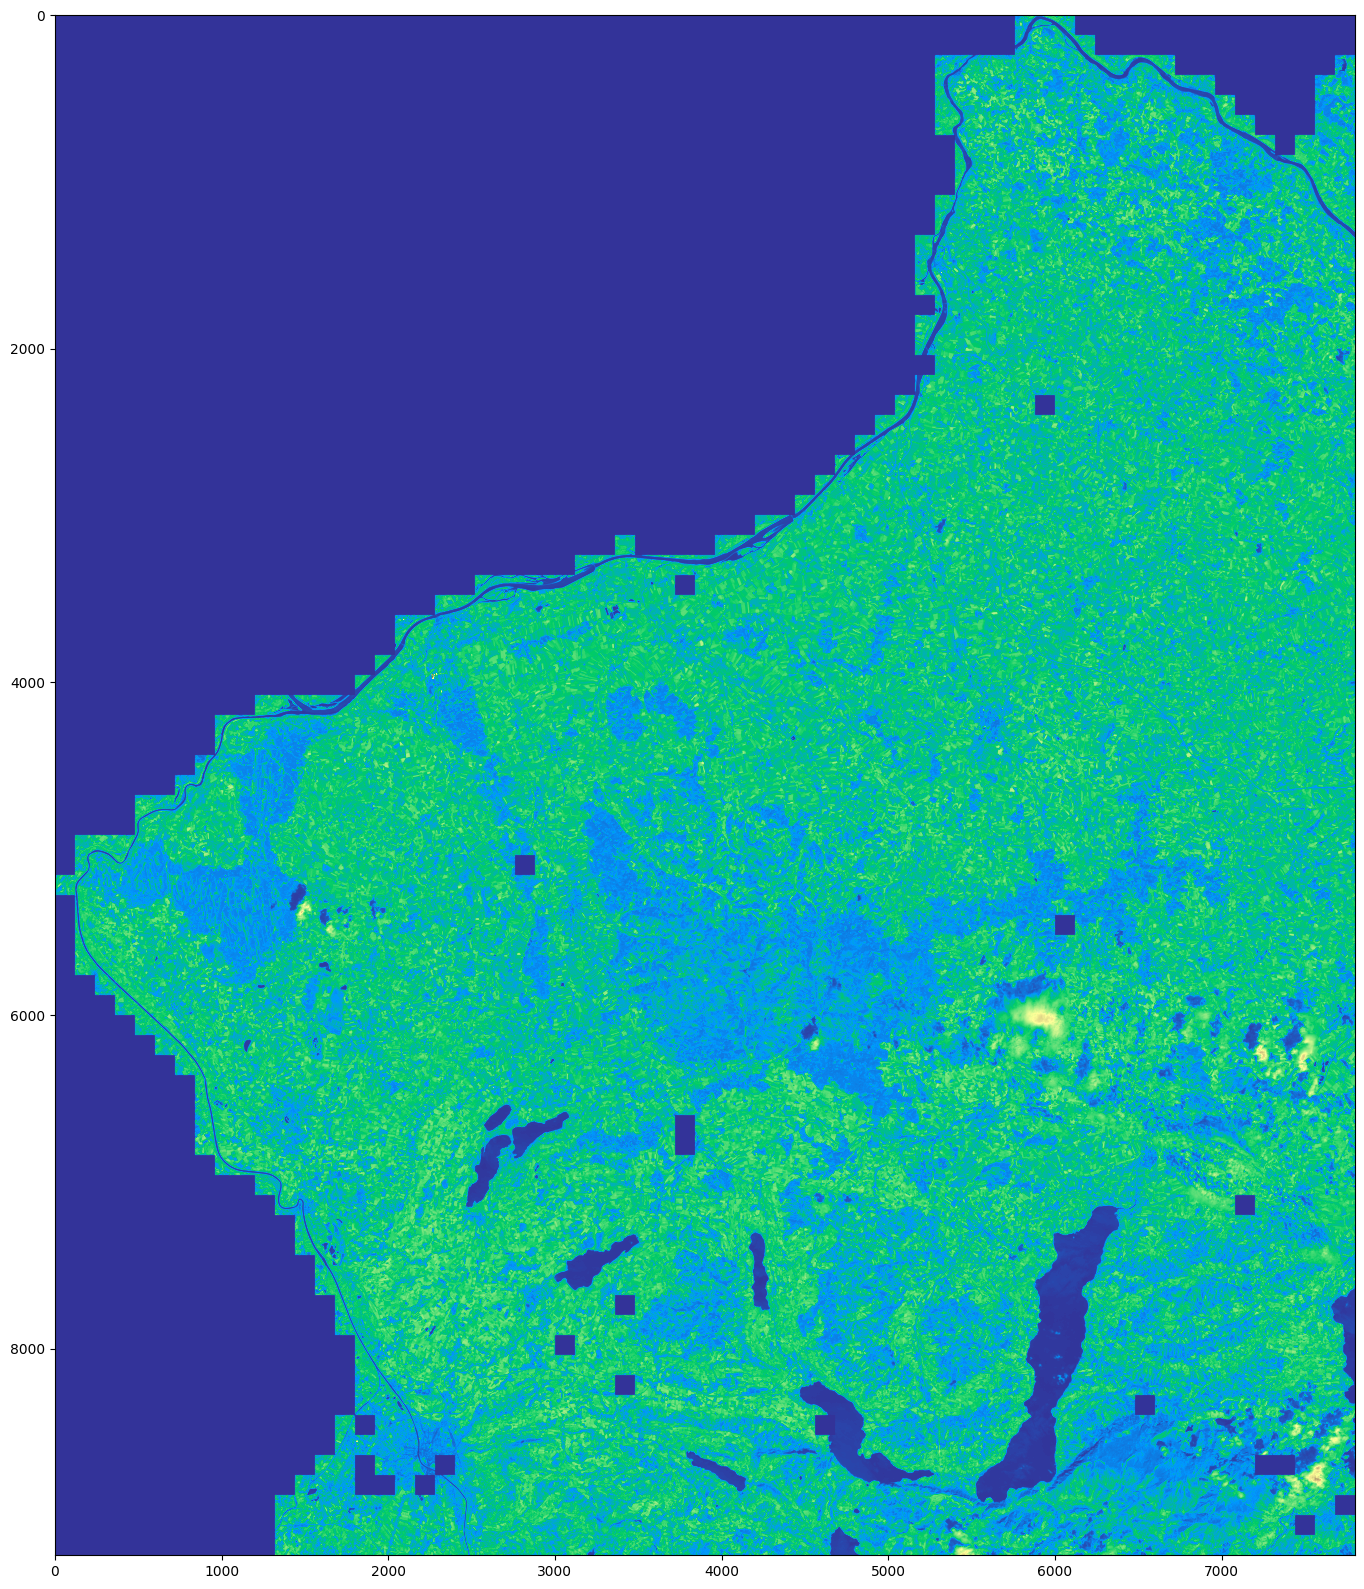

In [7]:
plt.figure(figsize=(20, 20))
show(mosaic, cmap='terrain')
plt.show()